# Spaceship Titanic

Filename: spaceship.ipynb \
Author: Timothy Holland \
Last updated: 20/06/2024 \
Kaggle competition: https://www.kaggle.com/competitions/spaceship-titanic/data

## Data Processing

#### Importing

In [9]:
import pandas as pd
import numpy as np

# Import the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')


In [10]:
# Separate the target variable
X_train = train_data.drop(['Transported', 'PassengerId'], axis=1)
y_train = train_data['Transported']

X_test = test_data.drop('PassengerId', axis=1)

In [11]:
print("Train dataset shape:", train_df.shape)
print("Test dataset shape:", X_test.shape)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

Train dataset shape: (8693, 14)
Test dataset shape: (4277, 12)
X_train shape: (8693, 12)
y_train shape: (8693,)


#### Analysing

In [12]:
# Print the first few rows of the train dataset
print(train_data.head())

print()
# Get information about the dataset
print(train_data.info())

print()
# Check for missing values
print(train_data.isnull().sum())

print()
# Get summary statistics
print(train_data.describe())

print()
# Check the distribution of the target variable
print(y_train.value_counts())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  

<

#### Numeric correlation with target variable

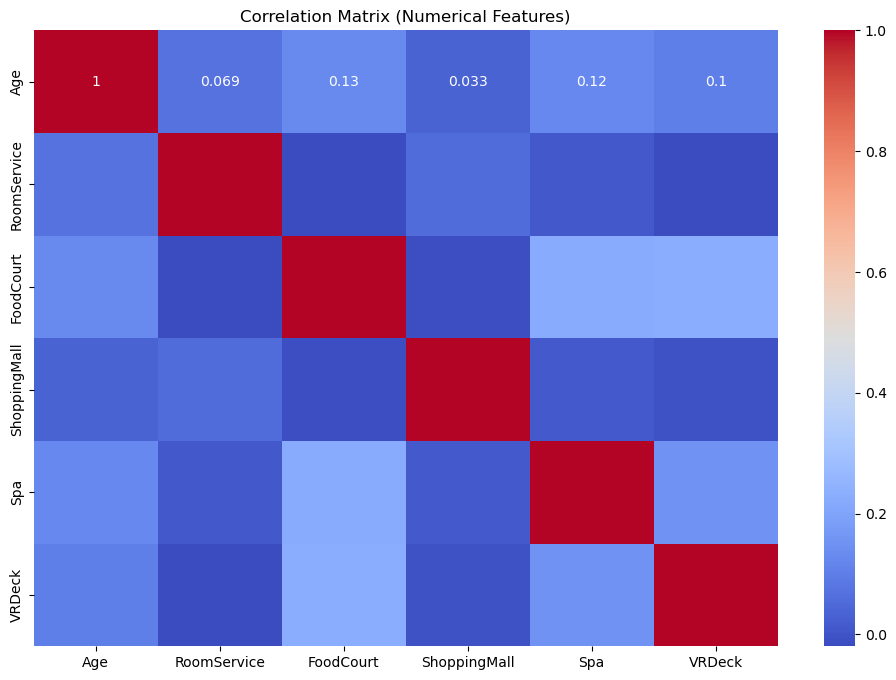

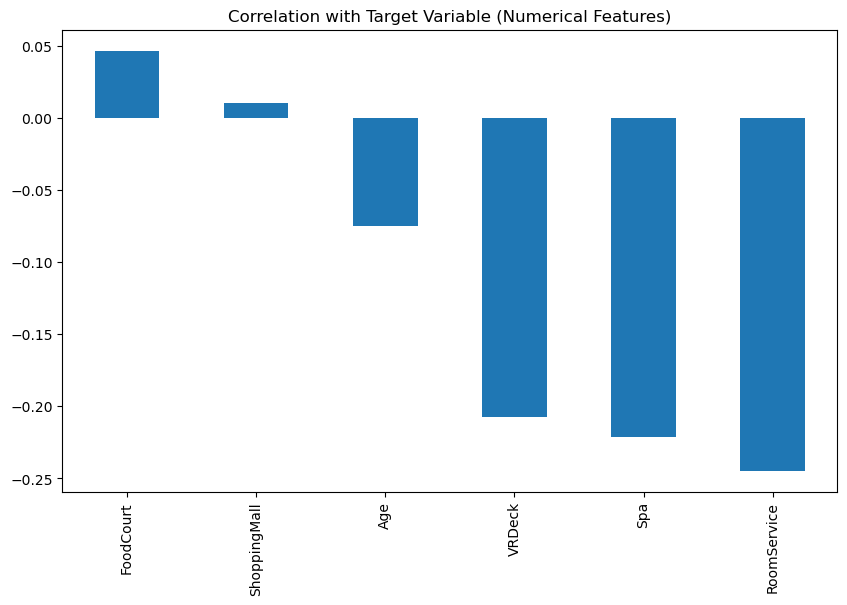

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Correlation matrix
numerical_cols = train_data.select_dtypes(include=[np.number]).columns
corr = train_data[numerical_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numerical Features)')
plt.show()

# Correlation with target variable
corr_target = train_data[numerical_cols].corrwith(y_train)
corr_target = corr_target.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
corr_target.plot(kind='bar')
plt.title('Correlation with Target Variable (Numerical Features)')
plt.show()

#### Analysing missing values

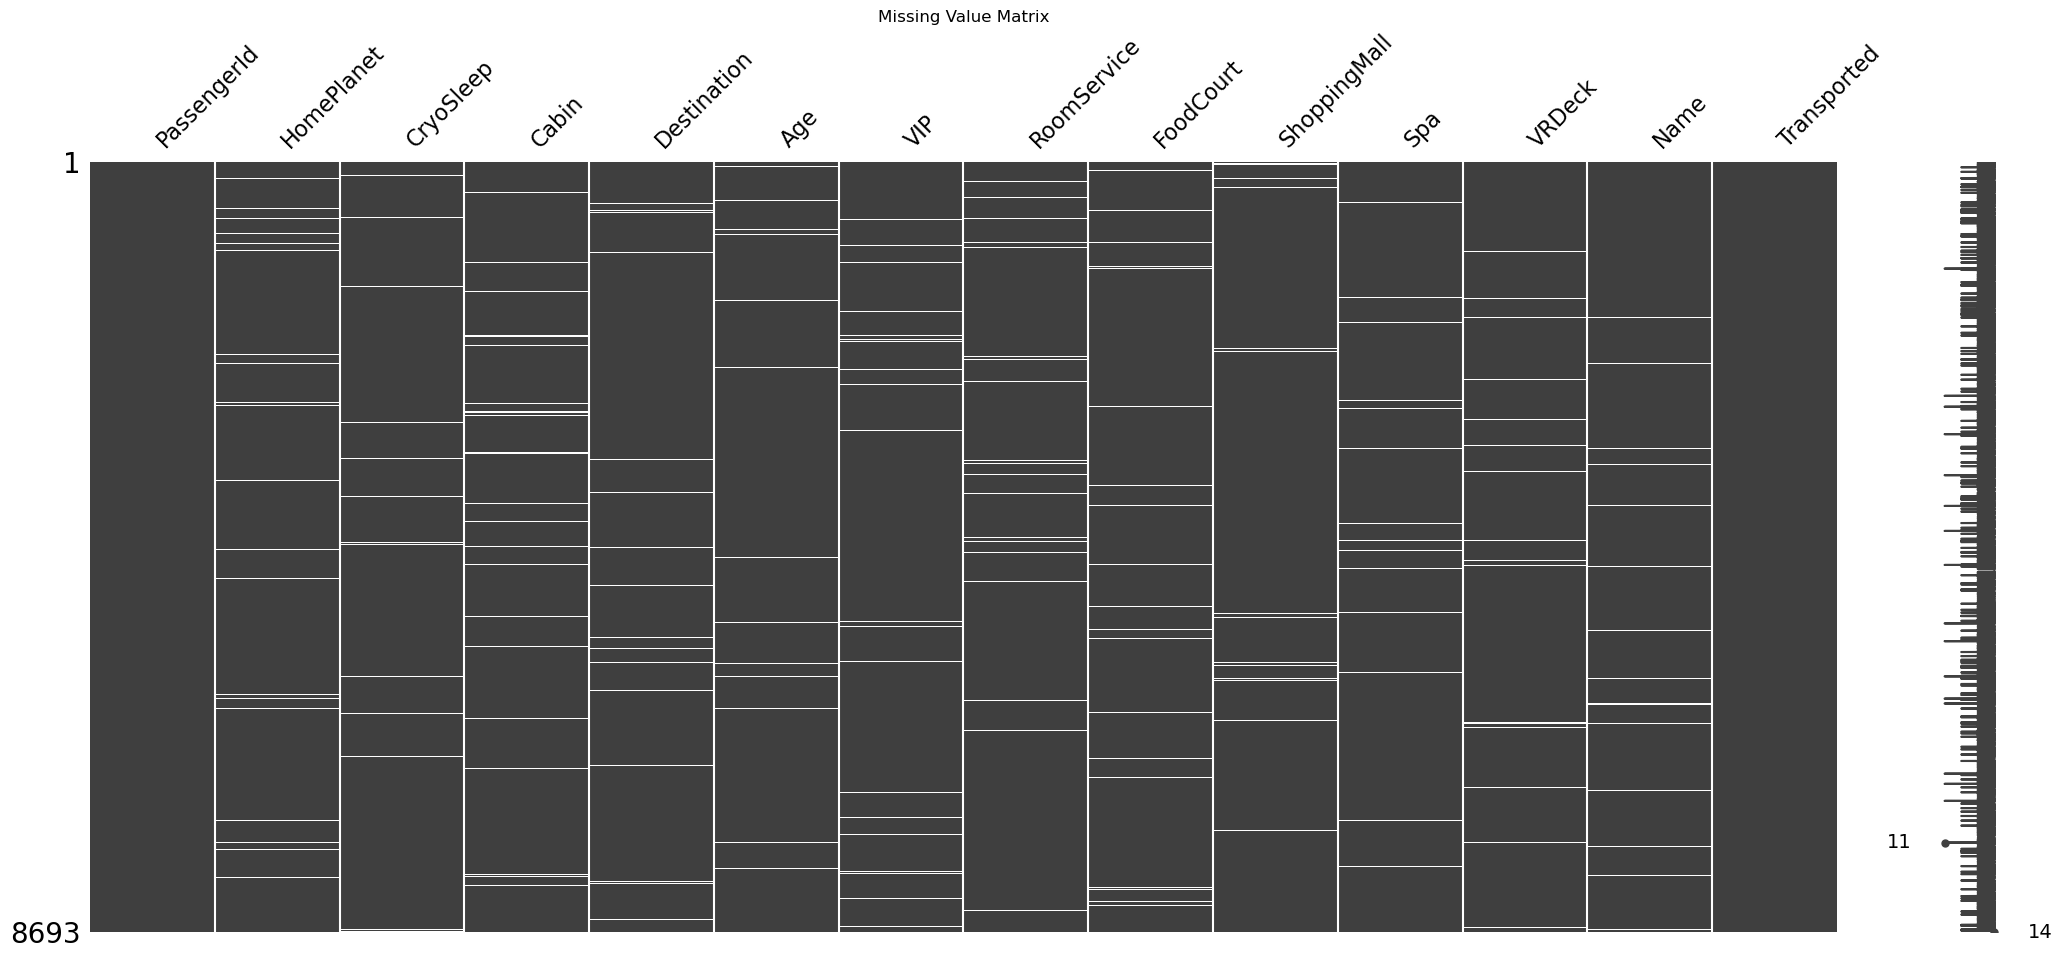

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

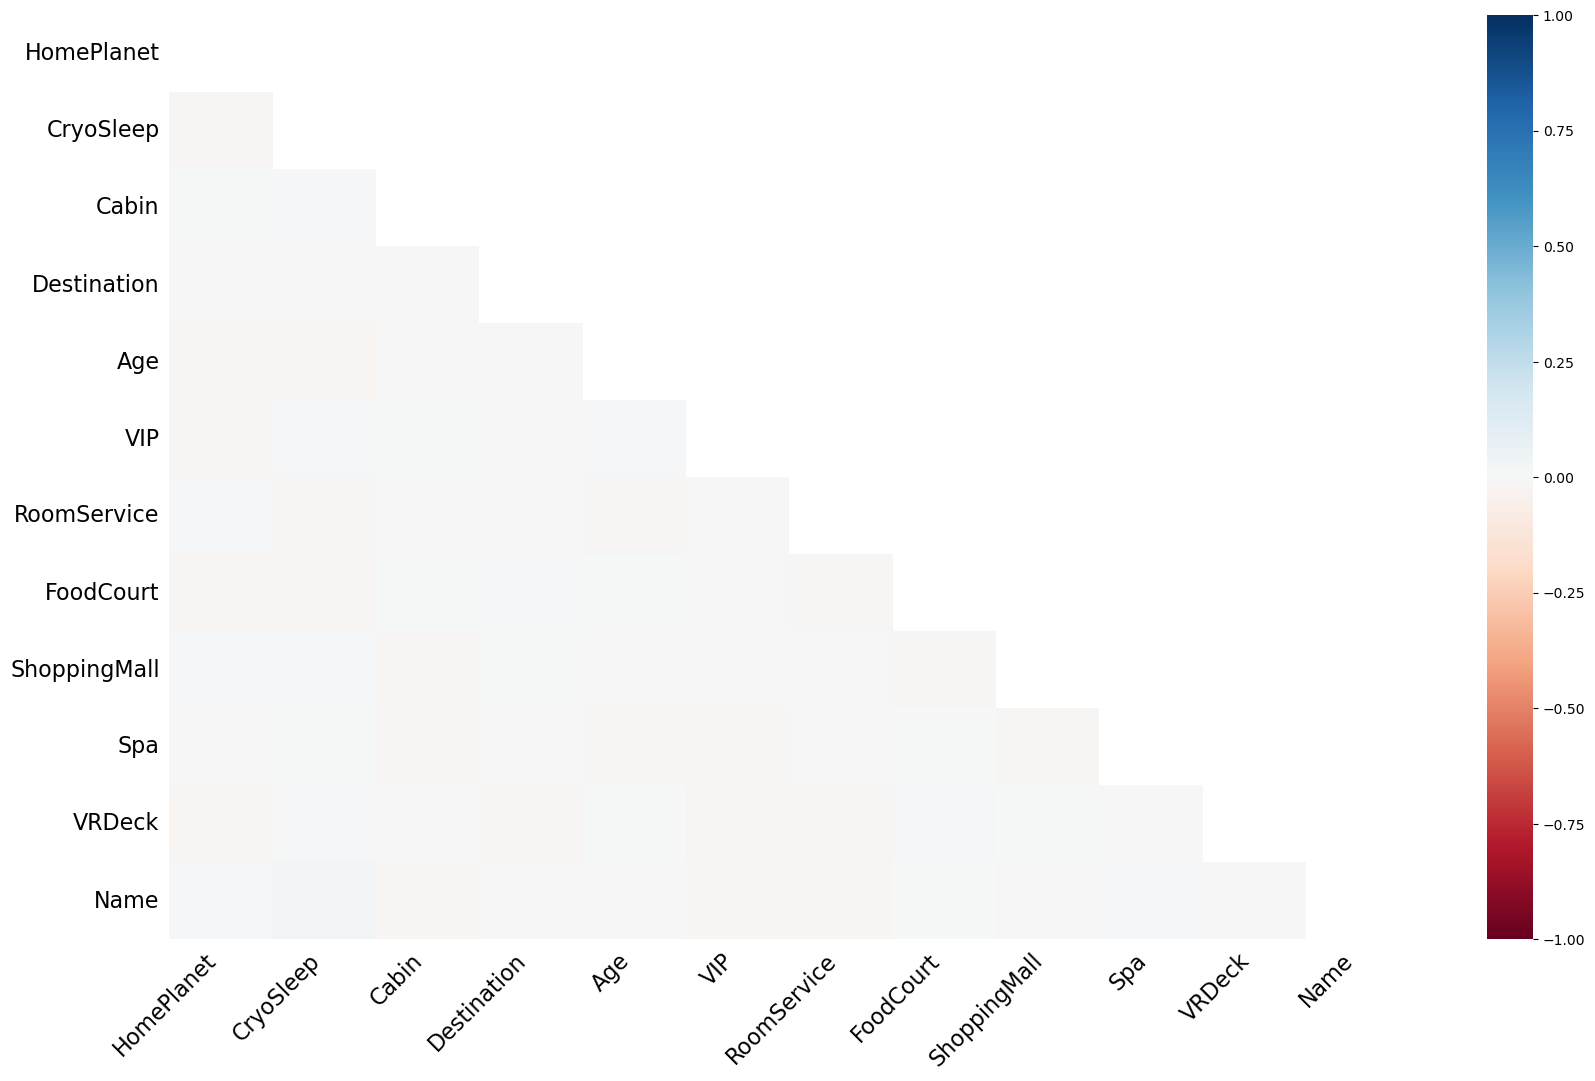

In [17]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize missing data patterns
msno.matrix(train_data)
plt.title('Missing Value Matrix')
plt.show()

msno.heatmap(train_data)
plt.title('Missing Value Correlation Heatmap')
plt.show()

In [18]:
def missing_vs_target(df, target):
    missing_cols = df.columns[df.isnull().any()].tolist()
    
    for col in missing_cols:
        temp_df = df.copy()
        temp_df[f'{col}_is_missing'] = temp_df[col].isnull()
        
        print(f"\nMissing values in {col} vs {target}:")
        print(temp_df.groupby(f'{col}_is_missing')[target].mean())
        
        # You can also perform a statistical test here, e.g., chi-square test

missing_vs_target(train_data, 'Transported')


Missing values in HomePlanet vs Transported:
HomePlanet_is_missing
False    0.503415
True     0.512438
Name: Transported, dtype: float64

Missing values in CryoSleep vs Transported:
CryoSleep_is_missing
False    0.504011
True     0.488479
Name: Transported, dtype: float64

Missing values in Cabin vs Transported:
Cabin_is_missing
False    0.503650
True     0.502513
Name: Transported, dtype: float64

Missing values in Destination vs Transported:
Destination_is_missing
False    0.503584
True     0.505495
Name: Transported, dtype: float64

Missing values in Age vs Transported:
Age_is_missing
False    0.503641
True     0.502793
Name: Transported, dtype: float64

Missing values in VIP vs Transported:
VIP_is_missing
False    0.503416
True     0.512315
Name: Transported, dtype: float64

Missing values in RoomService vs Transported:
RoomService_is_missing
False    0.504582
True     0.458564
Name: Transported, dtype: float64

Missing values in FoodCourt vs Transported:
FoodCourt_is_missing
Fals

In [19]:
def missing_vs_features(df):
    missing_cols = df.columns[df.isnull().any()].tolist()
    
    for col in missing_cols:
        print(f"\nMean values when {col} is missing vs not missing:")
        
        for other_col in df.columns:
            if other_col != col and df[other_col].dtype in ['int64', 'float64']:
                missing_mean = df[df[col].isnull()][other_col].mean()
                not_missing_mean = df[df[col].notnull()][other_col].mean()
                
                print(f"{other_col}: Missing = {missing_mean:.2f}, Not Missing = {not_missing_mean:.2f}")

missing_vs_features(train_data)


Mean values when HomePlanet is missing vs not missing:
Age: Missing = 28.79, Not Missing = 28.83
RoomService: Missing = 202.79, Not Missing = 225.20
FoodCourt: Missing = 262.64, Not Missing = 462.76
ShoppingMall: Missing = 141.74, Not Missing = 174.48
Spa: Missing = 231.76, Not Missing = 313.03
VRDeck: Missing = 284.92, Not Missing = 305.33

Mean values when CryoSleep is missing vs not missing:
Age: Missing = 27.92, Not Missing = 28.85
RoomService: Missing = 218.41, Not Missing = 224.85
FoodCourt: Missing = 460.92, Not Missing = 458.00
ShoppingMall: Missing = 146.00, Not Missing = 174.43
Spa: Missing = 277.64, Not Missing = 311.99
VRDeck: Missing = 295.14, Not Missing = 305.10

Mean values when Cabin is missing vs not missing:
Age: Missing = 29.15, Not Missing = 28.82
RoomService: Missing = 341.25, Not Missing = 221.95
FoodCourt: Missing = 461.70, Not Missing = 457.99
ShoppingMall: Missing = 132.86, Not Missing = 174.70
Spa: Missing = 501.69, Not Missing = 306.62
VRDeck: Missing = 250